In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("sf18_cleaned.csv")

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
data.head()

,Unnamed: 0,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration [s],Date_s,Weekday_s,Hour_s,Date_e,Weekday_e,Hour_e,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
0,0,2018-01-31 22:52:36,2018-02-01 19:47:20,120,285,Mission Dolores Park,Webster St at O'Farrell St,2765,Subscriber,75284.0,2018-01-31,2,22,2018-02-01,3,19,37.761420,-122.426435,37.783521,-122.431158
1,1,2018-01-31 16:13:35,2018-02-01 15:57:18,15,15,San Francisco Ferry Building (Harry Bridges Pl...,San Francisco Ferry Building (Harry Bridges Pl...,2815,Customer,85423.0,2018-01-31,2,16,2018-02-01,3,15,37.795392,-122.394203,37.795392,-122.394203
2,2,2018-01-31 14:23:56,2018-02-01 10:16:53,304,296,Jackson St at 5th St,5th St at Virginia St,3039,Customer,71577.0,2018-01-31,2,14,2018-02-01,3,10,37.348759,-121.894798,37.325998,-121.877120
3,3,2018-01-31 14:53:24,2018-02-01 07:51:21,75,47,Market St at Franklin St,4th St at Harrison St,321,Customer,61077.0,2018-01-31,2,14,2018-02-01,3,7,37.773793,-122.421239,37.780955,-122.399749
4,4,2018-01-31 19:52:25,2018-02-01 06:58:32,74,19,Laguna St at Hayes St,Post St at Kearny St,617,Subscriber,39967.0,2018-01-31,2,19,2018-02-01,3,6,37.776435,-122.426244,37.788975,-122.403452


In [5]:
%matplotlib inline

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_palette("GnBu_d")

# also import these "new" libraries 
# Note: you may have to download an add them to your environment (using e.g. 'conda install -c conda-forge folium')

import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random
#import timeit

<H3>Number of unique bikes used on rides per hour (Bike demand)</H3>

In [7]:
data_hour_avail = data.groupby("Hour_s")["bike_id"].nunique()
print(data_hour_avail)

Hour_s
0     3560
1     2815
2     2141
3     1521
4     1828
5     3426
6     4120
7     4462
8     4640
9     4630
10    4575
11    4567
12    4660
13    4653
14    4647
15    4684
16    4711
17    4720
18    4667
19    4544
20    4466
21    4374
22    4249
23    4022
Name: bike_id, dtype: int64


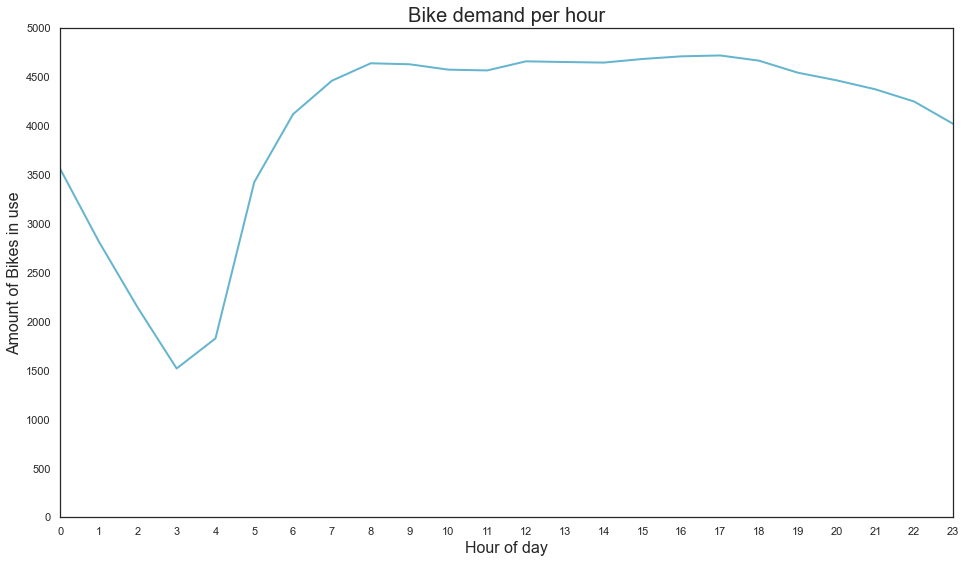

In [8]:
fig,ax = plt.subplots(figsize=(16,9)) 
sns.set_style("whitegrid")

ax.plot(data_hour_avail, color='c', linewidth=2)
ax.set_ylim((0,5000))
ax.set_xlim([0,23])

ax.set_title("Bike demand per hour",fontsize=20)
ax.set_ylabel("Amount of Bikes in use", fontsize = 16)
ax.set_xlabel("Hour of day", fontsize = 16)

ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
ax.set_yticks([0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000])


plt.show()

<H3>Hourly number of rides during weekday and weekend</H3>

In [9]:
data_weekday = data[(data.Weekday_s < 5)]
data_weekend = data[(data.Weekday_s > 4)]

weekday_start_group_hour = data_weekday.groupby("Hour_s")["start_time"].nunique()
weekend_start_group_hour = data_weekend.groupby("Hour_s")["start_time"].nunique()
data_start_group_hour = data.groupby("Hour_s")["start_time"].nunique()

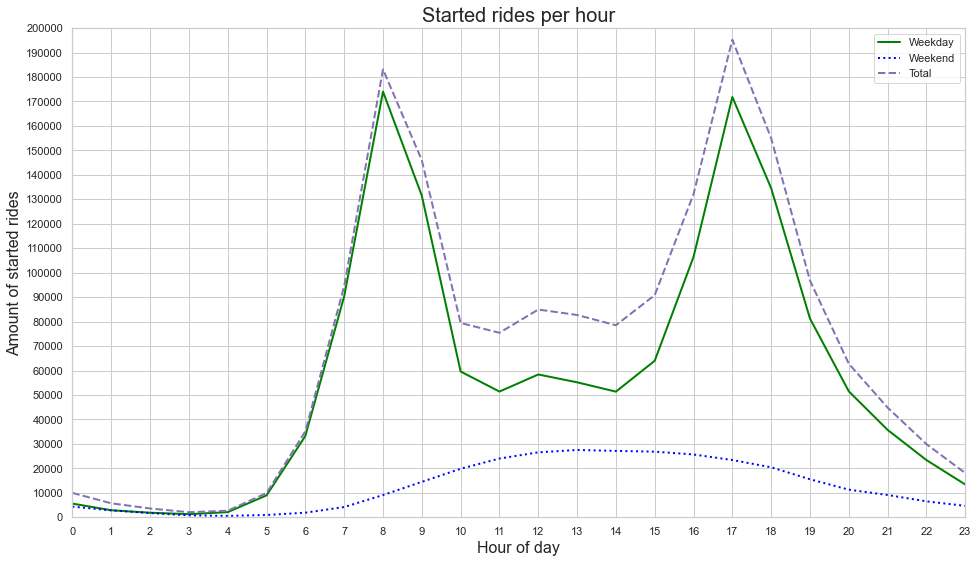

In [10]:
fig,ax2 = plt.subplots(figsize=(16,9)) 
sns.set_style("whitegrid")

ax2.plot(weekday_start_group_hour, label="Weekday", color='green', linewidth=2)
ax2.plot(weekend_start_group_hour, label="Weekend", color='blue', linewidth=2, linestyle='dotted')
ax2.plot(data_start_group_hour, label="Total", color='m', linewidth=2,linestyle='--')
ax2.set_ylim((0,200000))
ax2.set_xlim([0,23])

ax2.set_title("Started Rides per hour",fontsize=20)
ax2.set_ylabel("Amount of Started Rides", fontsize = 16)
ax2.set_xlabel("Hour of Day", fontsize = 16)
ax2.legend();

ax2.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
#ax2.set_yticks([0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000,140000,150000,160000,170000,180000,190000,200000])
ax2.set_yticks(np.arange(0,210000,10000))

plt.show()

This graph shows, that there is a clear trend towards demand during morning and evening rush hours, implying that a large (or rather most active) part of the customer base are people using the bikes to get to work and back home again.
Corroborating that theory is the fact, that there are far less rides undertaken during the weekend. ##Do a graph on mean rides during weekday/end

<H3>Difference in rides seasonally</H3>

In [11]:
data["month"] = pd.DatetimeIndex(data["Date_s"]).month
data["year"] = pd.DatetimeIndex(data["Date_s"]).year

data_winter = data.loc[(data.month == 1)|(data.month == 2)|(data.month == 12)]
data_spring = data[(data.month == 3)|(data.month == 4)|(data.month == 5)]
data_summer = data[(data.month == 6)|(data.month == 7)|(data.month == 8)]
data_fall = data[(data.month == 9)|(data.month == 10)|(data.month == 11)]


winter_start_group_month = data_winter.groupby("month")["start_time"].nunique()
spring_start_group_month = data_spring.groupby("month")["start_time"].nunique()
summer_start_group_month = data_summer.groupby("month")["start_time"].nunique()
fall_start_group_month = data_fall.groupby("month")["start_time"].nunique()

start_group_month = data.groupby("month")["start_time"].nunique()


In [12]:
#fig,ax3 = plt.subplots(figsize=(16,9)) 
#sns.set_style("whitegrid")

#seasons = ["Winter", "Spring", "Summer", "Fall"]
#ax3.bar(seasons, winter_start_group_month)
#ax3.bar(spring_start_group_month, label="Spring", color='g', linewidth=2, linestyle='dotted')
#ax3.bar(summer_start_group_month, label="Summer", color='r', linewidth=2,linestyle='--')
#ax3.bar(fall_start_group_month, label="Fall", color='y', linewidth=2,linestyle='--')

#ax3.set_ylim((0,5000))
#ax3.set_xlim([0,365])

#ax3.legend();

#ax2.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
#ax2.set_yticks([0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000,140000,150000,160000,170000,180000,190000,200000])


#plt.show()

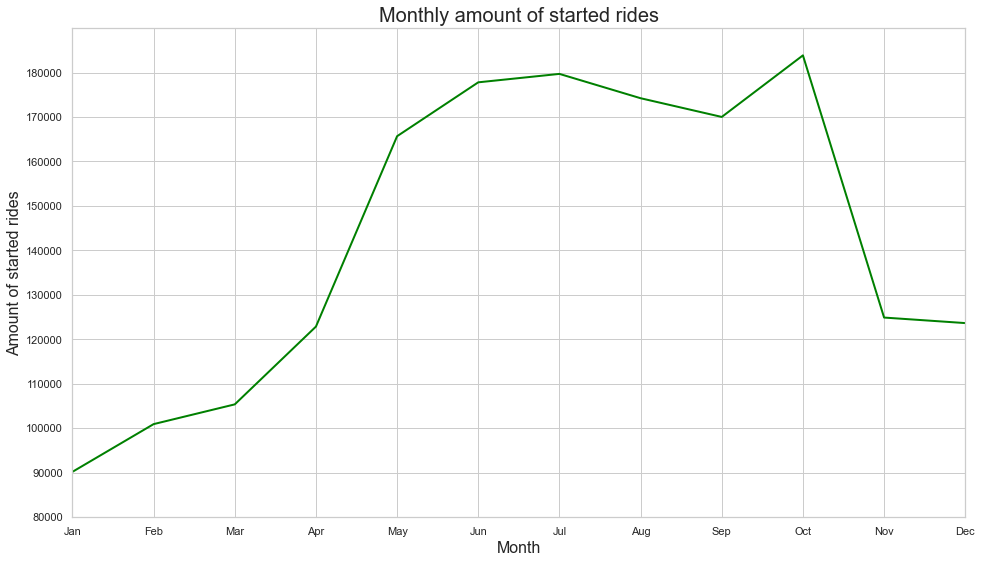

In [13]:
fig,ax4 = plt.subplots(figsize=(16,9)) 
sns.set_style("whitegrid")

ax4.plot(start_group_month, label="Weekday", color='green', linewidth=2)
ax4.set_ylim((80000,190000))
ax4.set_xlim([1,12])

x_ticks_labels = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

ax4.set_title("Monthly amount of started rides",fontsize=20)
ax4.set_ylabel("Amount of started rides", fontsize = 16)
ax4.set_xlabel("Month", fontsize = 16)
#ax2.legend();

ax4.set_xticks(np.arange(1,13,1))
ax4.set_xticklabels(x_ticks_labels)
ax4.set_yticks([80000,90000,100000,110000,120000,130000,140000,150000,160000,170000,180000])


plt.show()

In [14]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
weathersf = pd.read_csv("weather_hourly_sf.csv")
weatherdata = weathersf.dropna(axis=0)

weatherdata["month"] = pd.DatetimeIndex(weatherdata["date_time"]).month
weatherdata["year"] = pd.DatetimeIndex(weatherdata["date_time"]).year
weatherdata18 = weatherdata.loc[weatherdata.year == 2018]
weatherdata18
#weather_group_month = weatherdata.groupby("month")["date_time"].nunique()

C:\Users\1337p\AppData\Local\Temp\ipykernel_8068\675078124.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weatherdata["month"] = pd.DatetimeIndex(weatherdata["date_time"]).month
C:\Users\1337p\AppData\Local\Temp\ipykernel_8068\675078124.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weatherdata["year"] = pd.DatetimeIndex(weatherdata["date_time"]).year


,date_time,max_temp,min_temp,precip,month,year
8736,2018-01-01 01:00:00,13.3,13.3,0.0,1,2018
8737,2018-01-01 02:00:00,12.2,12.2,0.0,1,2018
8738,2018-01-01 03:00:00,11.1,11.1,0.0,1,2018
8739,2018-01-01 04:00:00,11.1,11.1,0.0,1,2018
8740,2018-01-01 05:00:00,9.4,9.4,0.0,1,2018
...,...,...,...,...,...,...
17514,2018-12-31 19:00:00,13.3,13.3,0.0,12,2018
17515,2018-12-31 20:00:00,13.9,13.9,0.0,12,2018
17516,2018-12-31 21:00:00,14.4,14.4,0.0,12,2018
17517,2018-12-31 22:00:00,14.4,14.4,0.0,12,2018


In [15]:
min_temp_month = [weatherdata18.loc[weatherdata18.month == 1]["min_temp"].mean(),
                  weatherdata18.loc[weatherdata18.month == 2]["min_temp"].mean(),
                 weatherdata18.loc[weatherdata18.month == 3]["min_temp"].mean(),
                 weatherdata18.loc[weatherdata18.month == 4]["min_temp"].mean(),
                 weatherdata18.loc[weatherdata18.month == 5]["min_temp"].mean(),
                 weatherdata18.loc[weatherdata18.month == 6]["min_temp"].mean(),
                 weatherdata18.loc[weatherdata18.month == 7]["min_temp"].mean(),
                 weatherdata18.loc[weatherdata18.month == 8]["min_temp"].mean(),
                 weatherdata18.loc[weatherdata18.month == 9]["min_temp"].mean(),
                 weatherdata18.loc[weatherdata18.month == 10]["min_temp"].mean(),
                 weatherdata18.loc[weatherdata18.month == 11]["min_temp"].mean(),
                 weatherdata18.loc[weatherdata18.month == 12]["min_temp"].mean(),]

max_temp_month = [weatherdata18.loc[weatherdata18.month == 1]["max_temp"].mean(),
                  weatherdata18.loc[weatherdata18.month == 2]["max_temp"].mean(),
                 weatherdata18.loc[weatherdata18.month == 3]["max_temp"].mean(),
                 weatherdata18.loc[weatherdata18.month == 4]["max_temp"].mean(),
                 weatherdata18.loc[weatherdata18.month == 5]["max_temp"].mean(),
                 weatherdata18.loc[weatherdata18.month == 6]["max_temp"].mean(),
                 weatherdata18.loc[weatherdata18.month == 7]["max_temp"].mean(),
                 weatherdata18.loc[weatherdata18.month == 8]["max_temp"].mean(),
                 weatherdata18.loc[weatherdata18.month == 9]["max_temp"].mean(),
                 weatherdata18.loc[weatherdata18.month == 10]["max_temp"].mean(),
                 weatherdata18.loc[weatherdata18.month == 11]["max_temp"].mean(),
                 weatherdata18.loc[weatherdata18.month == 12]["max_temp"].mean(),]
max_temp_month

[10.93427419354839,
 10.997321428571436,
 11.808870967741925,
 13.37980501392757,
 14.349661705006765,
 16.015438108483966,
 16.77002688172036,
 16.60013623978203,
 16.048333333333293,
 16.39259757738898,
 13.186230876216985,
 11.175639300134582]

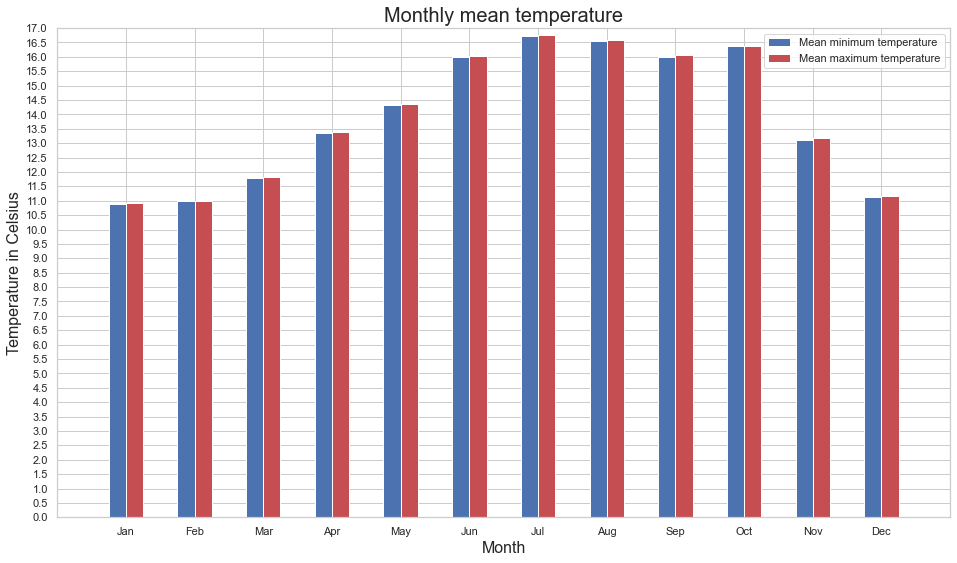

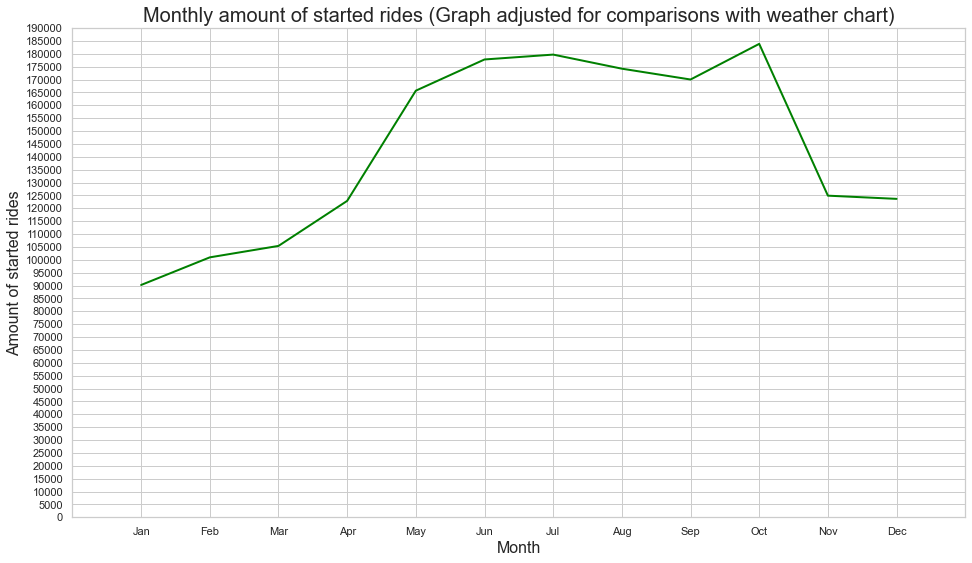

In [16]:
fig,ax5 = plt.subplots(figsize=(16,9))
ax5.set_ylim((0,17))
ax5.set_xlim([0,13])
#fuck = np.arange(len(x_ticks_labels))


ax5.set_xticks(np.arange(1,13,1))
ax5.set_xticklabels(x_ticks_labels)

ax5.bar(np.arange(1,13,1)-0.125,min_temp_month, color = "b",width = 0.25,label = "Mean minimum temperature")
ax5.bar(np.arange(1,13,1)+0.125,max_temp_month, color = "r",width = 0.25,label = "Mean maximum temperature")

ax5.set_yticks(np.arange(0,17.5,0.5))

ax5.legend();
ax5.set_title("Monthly mean temperature",fontsize=20)
ax5.set_ylabel("Temperature in Celsius", fontsize = 16)
ax5.set_xlabel("Month", fontsize = 16)

plt.show()



fig,ax4 = plt.subplots(figsize=(16,9)) 
sns.set_style("whitegrid")

ax4.plot(start_group_month, label="Weekday", color='green', linewidth=2)
ax4.set_ylim((0,190000))
ax4.set_xlim([0,13])

x_ticks_labels = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

ax4.set_title("Monthly amount of started rides (Graph adjusted for comparisons with weather chart)",fontsize=20)
ax4.set_ylabel("Amount of started rides", fontsize = 16)
ax4.set_xlabel("Month", fontsize = 16)
#ax2.legend();

ax4.set_xticks(np.arange(1,13,1))
ax4.set_xticklabels(x_ticks_labels)
ax4.set_yticks(np.arange(0,195000,5000))


plt.show()

After adjusting the graph for monthly amount of started rides to align with the graph visualizing monthly mean temperatures, we can see that the seems to be a clear correlation between the temperature and the willingness to use the bike service. This of course makes sense intuitively, because bikes don't offer any protection against cold temperatures and/or rain, snow etc.

<H3>Analysis of ride duration</H3>

In [17]:
data.iloc[:10,1:3]

,start_time,end_time
0,2018-01-31 22:52:36,2018-02-01 19:47:20
1,2018-01-31 16:13:35,2018-02-01 15:57:18
2,2018-01-31 14:23:56,2018-02-01 10:16:53
3,2018-01-31 14:53:24,2018-02-01 07:51:21
4,2018-01-31 19:52:25,2018-02-01 06:58:32
5,2018-01-31 22:58:45,2018-02-01 00:46:42
6,2018-01-31 23:53:54,2018-02-01 00:01:27
7,2018-01-31 23:52:10,2018-01-31 23:55:11
8,2018-01-31 23:34:57,2018-01-31 23:51:33
9,2018-01-31 23:34:15,2018-01-31 23:48:00


In [18]:
data["start"] = pd.DatetimeIndex(data["start_time"]) 
data["end"] = pd.DatetimeIndex(data["end_time"]) #Bringing start_time and end_time into workable DateTime objects
data._get_value(8,"end")-data._get_value(8,"start") #using the DateTime objects to easily calculate Timedelta objects for the ride durations

Timedelta('0 days 00:16:36')

In [19]:
data["ride_duration"] = data["end"]-data["start"]
data.head()

,Unnamed: 0,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration [s],...,Hour_e,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,month,year,start,end,ride_duration
0,0,2018-01-31 22:52:36,2018-02-01 19:47:20,120,285,Mission Dolores Park,Webster St at O'Farrell St,2765,Subscriber,75284.0,...,19,37.761420,-122.426435,37.783521,-122.431158,1,2018,2018-01-31 22:52:36,2018-02-01 19:47:20,0 days 20:54:44
1,1,2018-01-31 16:13:35,2018-02-01 15:57:18,15,15,San Francisco Ferry Building (Harry Bridges Pl...,San Francisco Ferry Building (Harry Bridges Pl...,2815,Customer,85423.0,...,15,37.795392,-122.394203,37.795392,-122.394203,1,2018,2018-01-31 16:13:35,2018-02-01 15:57:18,0 days 23:43:43
2,2,2018-01-31 14:23:56,2018-02-01 10:16:53,304,296,Jackson St at 5th St,5th St at Virginia St,3039,Customer,71577.0,...,10,37.348759,-121.894798,37.325998,-121.877120,1,2018,2018-01-31 14:23:56,2018-02-01 10:16:53,0 days 19:52:57
3,3,2018-01-31 14:53:24,2018-02-01 07:51:21,75,47,Market St at Franklin St,4th St at Harrison St,321,Customer,61077.0,...,7,37.773793,-122.421239,37.780955,-122.399749,1,2018,2018-01-31 14:53:24,2018-02-01 07:51:21,0 days 16:57:57
4,4,2018-01-31 19:52:25,2018-02-01 06:58:32,74,19,Laguna St at Hayes St,Post St at Kearny St,617,Subscriber,39967.0,...,6,37.776435,-122.426244,37.788975,-122.403452,1,2018,2018-01-31 19:52:25,2018-02-01 06:58:32,0 days 11:06:07


Now to split up the rides by ride duration (under 5mins, between 5-15mins, between 15-30mins, between 30-60mins and over 60mins) and use grouping/plotting methods already used earlier to analyze ride durations depending on the time of day

In [20]:
u5min = data.loc[data.ride_duration  <= timedelta(minutes=5)]
u15min = data.loc[(timedelta(minutes=5) <= data.ride_duration) & (data.ride_duration <= timedelta(minutes=15))]
u30min = data.loc[(timedelta(minutes=15) <= data.ride_duration) & (data.ride_duration <= timedelta(minutes=30))]
u60min = data.loc[(timedelta(minutes=30) <= data.ride_duration) & (data.ride_duration <= timedelta(minutes=60))]
o60min = data.loc[timedelta(minutes=60) >= data.ride_duration]

u5hour = u5min.groupby("Hour_s")["start_time"].nunique()
u15hour = u15min.groupby("Hour_s")["start_time"].nunique()
u30hour = u30min.groupby("Hour_s")["start_time"].nunique()
u60hour = u60min.groupby("Hour_s")["start_time"].nunique()
o60hour = o60min.groupby("Hour_s")["start_time"].nunique()

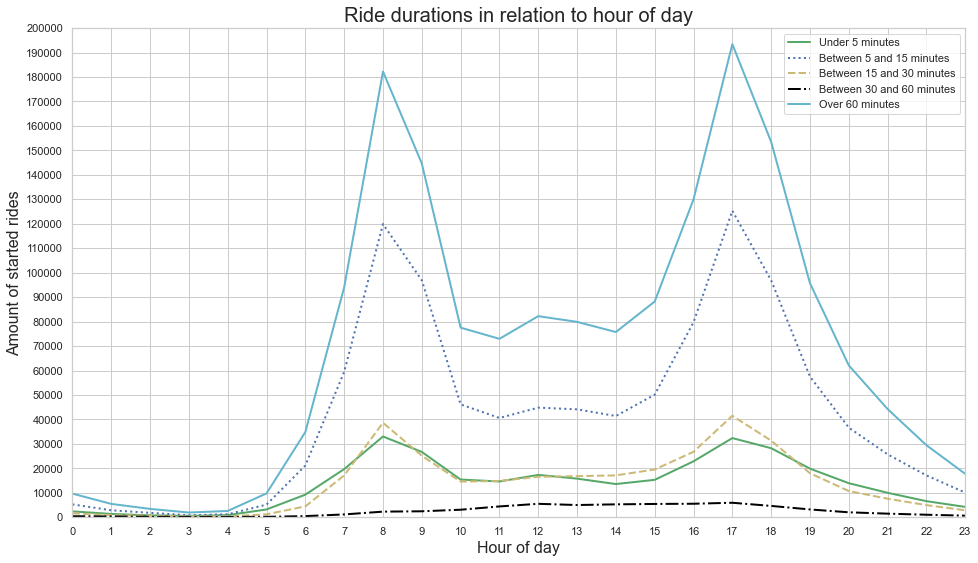

In [21]:
fig,ax5 = plt.subplots(figsize=(16,9)) 
sns.set_style("whitegrid")

ax5.plot(u5hour, label="Under 5 minutes", color='g', linewidth=2)
ax5.plot(u15hour, label="Between 5 and 15 minutes", color='b', linewidth=2, linestyle='dotted')
ax5.plot(u30hour, label="Between 15 and 30 minutes", color='y', linewidth=2,linestyle='--')
ax5.plot(u60hour, label="Between 30 and 60 minutes", color='black', linewidth=2,linestyle='dashdot')
ax5.plot(o60hour, label="Over 60 minutes", color='c', linewidth=2,linestyle='-')

ax5.set_ylim((0,200000))
ax5.set_xlim([0,23])

ax5.set_title("Ride durations in relation to hour of day",fontsize=20)
ax5.set_ylabel("Amount of started rides", fontsize = 16)
ax5.set_xlabel("Hour of day", fontsize = 16)
ax5.legend();

ax5.set_xticks(np.arange(0,24,1))
ax5.set_yticks(np.arange(0,210000,10000))

plt.show()

A lot of the plotted lines in this graph look similar to the "hourly started rides" graph, from which we empirically deduced that a lot of riders use the service to commute to work. Now we can add to that theory the knowledge, that a majority of these rides are either very long (over 60 minutes) or fairly short (between 5 and 15 minutes). This knowledge can be used to strategically place bikes certain distances away from major economic hotspots of San Francisco.

We want to take a look at ride duration patterns in relation to weekdays

In [22]:
data["weekday"] = pd.DatetimeIndex(data["start_time"]).weekday

u5min["weekday"] = pd.DatetimeIndex(u5min["start_time"]).weekday
u15min["weekday"] = pd.DatetimeIndex(u15min["start_time"]).weekday
u30min["weekday"] = pd.DatetimeIndex(u30min["start_time"]).weekday
u60min["weekday"] = pd.DatetimeIndex(u60min["start_time"]).weekday
o60min["weekday"] = pd.DatetimeIndex(o60min["start_time"]).weekday

C:\Users\1337p\AppData\Local\Temp\ipykernel_8068\2698557272.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u5min["weekday"] = pd.DatetimeIndex(u5min["start_time"]).weekday
C:\Users\1337p\AppData\Local\Temp\ipykernel_8068\2698557272.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  u15min["weekday"] = pd.DatetimeIndex(u15min["start_time"]).weekday
C:\Users\1337p\AppData\Local\Temp\ipykernel_8068\2698557272.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [23]:
u5day = u5min.groupby("weekday")["start_time"].nunique()
u15day = u15min.groupby("weekday")["start_time"].nunique()
u30day = u30min.groupby("weekday")["start_time"].nunique()
u60day = u60min.groupby("weekday")["start_time"].nunique()
o60day = o60min.groupby("weekday")["start_time"].nunique()

o60day

weekday
0    267164
1    289733
2    287307
3    285035
4    264647
5    158705
6    138712
Name: start_time, dtype: int64

C:\Users\1337p\AppData\Local\Temp\ipykernel_8068\2838951586.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax6.set_xticklabels(x6_ticks_labels)


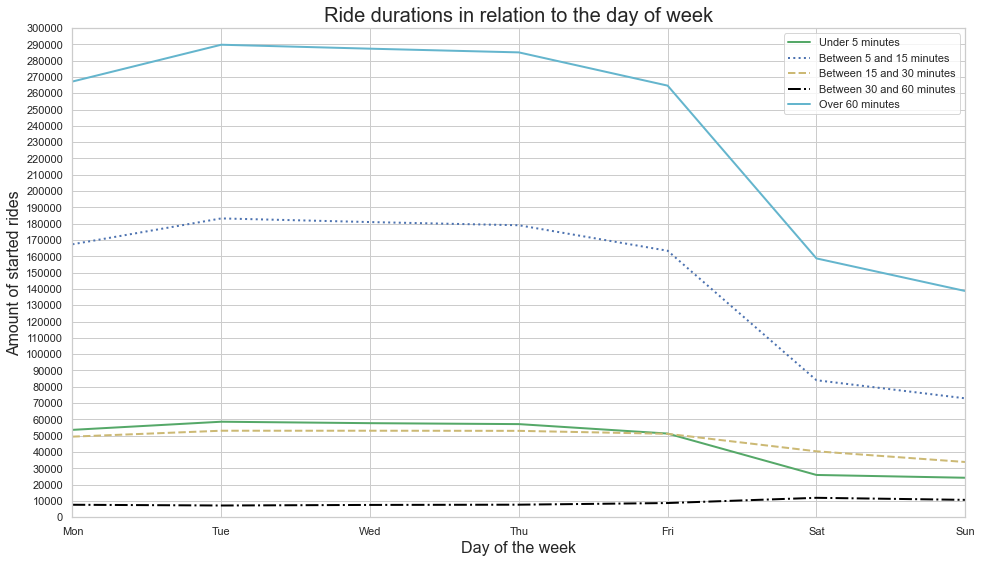

In [24]:
fig,ax6 = plt.subplots(figsize=(16,9)) 
sns.set_style("whitegrid")

ax6.plot(u5day, label="Under 5 minutes", color='g', linewidth=2)
ax6.plot(u15day, label="Between 5 and 15 minutes", color='b', linewidth=2, linestyle='dotted')
ax6.plot(u30day, label="Between 15 and 30 minutes", color='y', linewidth=2,linestyle='--')
ax6.plot(u60day, label="Between 30 and 60 minutes", color='black', linewidth=2,linestyle='dashdot')
ax6.plot(o60day, label="Over 60 minutes", color='c', linewidth=2,linestyle='-')

ax6.set_ylim((0,300000))
ax6.set_xlim([0,6])

ax6.set_title("Ride durations in relation to the day of week",fontsize=20)
ax6.set_ylabel("Amount of started rides", fontsize = 16)
ax6.set_xlabel("Day of the week", fontsize = 16)

x6_ticks_labels =  ["Mon", "Tue","Wed","Thu","Fri","Sat","Sun"]
ax6.set_xticklabels(x6_ticks_labels)

ax6.legend();

ax6.set_xticks(np.arange(0,7,1))
ax6.set_yticks(np.arange(0,310000,10000))

plt.show()

This graph shows that there is a difference between the demand patterns of weekend to weekend users, namely a slight but noticeable increase in rides between 30-60 minutes and a more shallow decline in pure ride numbers for the 15-30 minute category compared to most others.

<H3>Impact of precipitation in terms of number/duration of rides</H3>

In [25]:
weatherdata18.loc[weatherdata18.precip == 1].count()

date_time    307
max_temp     307
min_temp     307
precip       307
month        307
year         307
dtype: int64

In [26]:
weatherdata18.loc[weatherdata18.precip == 0].count()

date_time    8432
max_temp     8432
min_temp     8432
precip       8432
month        8432
year         8432
dtype: int64

Since the majority of data entries have no precipitation recorded, we cannot simply compare the raw number of started rides. To get a more accurate representation of how precipitation impacts the amount of rides, we take the mean of started rides during days with/without precipitation

In [27]:
weatherdata18["day"] = pd.DatetimeIndex(weatherdata18["date_time"]).day
weatherdata18["month"] = pd.DatetimeIndex(weatherdata18["date_time"]).month
weatherdata18["year"] = pd.DatetimeIndex(weatherdata18["date_time"]).year
weatherdata18

C:\Users\1337p\AppData\Local\Temp\ipykernel_8068\419651648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weatherdata18["day"] = pd.DatetimeIndex(weatherdata18["date_time"]).day
C:\Users\1337p\AppData\Local\Temp\ipykernel_8068\419651648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weatherdata18["month"] = pd.DatetimeIndex(weatherdata18["date_time"]).month
C:\Users\1337p\AppData\Local\Temp\ipykernel_8068\419651648.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,date_time,max_temp,min_temp,precip,month,year,day
8736,2018-01-01 01:00:00,13.3,13.3,0.0,1,2018,1
8737,2018-01-01 02:00:00,12.2,12.2,0.0,1,2018,1
8738,2018-01-01 03:00:00,11.1,11.1,0.0,1,2018,1
8739,2018-01-01 04:00:00,11.1,11.1,0.0,1,2018,1
8740,2018-01-01 05:00:00,9.4,9.4,0.0,1,2018,1
...,...,...,...,...,...,...,...
17514,2018-12-31 19:00:00,13.3,13.3,0.0,12,2018,31
17515,2018-12-31 20:00:00,13.9,13.9,0.0,12,2018,31
17516,2018-12-31 21:00:00,14.4,14.4,0.0,12,2018,31
17517,2018-12-31 22:00:00,14.4,14.4,0.0,12,2018,31


In [28]:
data["day"] = pd.DatetimeIndex(data["start_time"]).day
data

,Unnamed: 0,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration [s],...,start_station_longitude,end_station_latitude,end_station_longitude,month,year,start,end,ride_duration,weekday,day
0,0,2018-01-31 22:52:36,2018-02-01 19:47:20,120,285,Mission Dolores Park,Webster St at O'Farrell St,2765,Subscriber,75284.0,...,-122.426435,37.783521,-122.431158,1,2018,2018-01-31 22:52:36,2018-02-01 19:47:20,0 days 20:54:44,2,31
1,1,2018-01-31 16:13:35,2018-02-01 15:57:18,15,15,San Francisco Ferry Building (Harry Bridges Pl...,San Francisco Ferry Building (Harry Bridges Pl...,2815,Customer,85423.0,...,-122.394203,37.795392,-122.394203,1,2018,2018-01-31 16:13:35,2018-02-01 15:57:18,0 days 23:43:43,2,31
2,2,2018-01-31 14:23:56,2018-02-01 10:16:53,304,296,Jackson St at 5th St,5th St at Virginia St,3039,Customer,71577.0,...,-121.894798,37.325998,-121.877120,1,2018,2018-01-31 14:23:56,2018-02-01 10:16:53,0 days 19:52:57,2,31
3,3,2018-01-31 14:53:24,2018-02-01 07:51:21,75,47,Market St at Franklin St,4th St at Harrison St,321,Customer,61077.0,...,-122.421239,37.780955,-122.399749,1,2018,2018-01-31 14:53:24,2018-02-01 07:51:21,0 days 16:57:57,2,31
4,4,2018-01-31 19:52:25,2018-02-01 06:58:32,74,19,Laguna St at Hayes St,Post St at Kearny St,617,Subscriber,39967.0,...,-122.426244,37.788975,-122.403452,1,2018,2018-01-31 19:52:25,2018-02-01 06:58:32,0 days 11:06:07,2,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1842139,1842139,2018-12-01 00:11:55,2018-12-01 00:19:49,345,81,Hubbell St at 16th St,Berry St at 4th St,3035,Subscriber,474.0,...,-122.398295,37.775880,-122.393170,12,2018,2018-12-01 00:11:55,2018-12-01 00:19:49,0 days 00:07:54,5,1
1842140,1842140,2018-12-01 00:02:49,2018-12-01 00:16:50,10,58,Washington St at Kearny St,Market St at 10th St,2034,Subscriber,841.0,...,-122.404770,37.776619,-122.417385,12,2018,2018-12-01 00:02:49,2018-12-01 00:16:50,0 days 00:14:01,5,1
1842141,1842141,2018-12-01 00:05:28,2018-12-01 00:09:48,245,255,Downtown Berkeley BART,Virginia St at Shattuck Ave,2243,Subscriber,260.0,...,-122.267764,37.876573,-122.269528,12,2018,2018-12-01 00:05:28,2018-12-01 00:09:48,0 days 00:04:20,5,1
1842142,1842142,2018-12-01 00:03:07,2018-12-01 00:08:00,93,126,4th St at Mission Bay Blvd S,Esprit Park,545,Subscriber,293.0,...,-122.391198,37.761634,-122.390648,12,2018,2018-12-01 00:03:07,2018-12-01 00:08:00,0 days 00:04:53,5,1


In [29]:
data["date"] = pd.DatetimeIndex(data["start_time"]).date
date_start = data.groupby("date")["start_time"].nunique()
date_start

date
2018-01-01    1324
2018-01-02    3079
2018-01-03    2727
2018-01-04    3159
2018-01-05    2089
              ... 
2018-12-27    3277
2018-12-28    3245
2018-12-29    2777
2018-12-30    2525
2018-12-31    2896
Name: start_time, Length: 365, dtype: int64

In [103]:
weatherdata18["date"] = pd.DatetimeIndex(weatherdata18["date_time"]).date
weatherdata18
date_precip = weatherdata18.groupby("date")["precip"]
date_precip

C:\Users\1337p\AppData\Local\Temp\ipykernel_8068\3347904635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weatherdata18["date"] = pd.DatetimeIndex(weatherdata18["date_time"]).date
